# 1) Setup

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import math
import scipy as sp
from scipy.stats import kstest
from copy import copy

import pymongo
from pymongo import MongoClient
from datetime import datetime

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture

print("done")

C:\Users\pyliu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


done


In [11]:
#import functions from python files

#1) data import & filtering
from get_data import *
from filter_data import *
from filter_data2 import *
from filter_data3 import *
from select_data import *
from select_data_edge import *


#2) Goodness-of-fit
from underscore_prefix import *
from underscore_suffix import *

from edge_direction import *
from edge_plot import *
from edge_plot_gaussian import *
from edge_plot_lognormal import *

from update_mean import *
from goodness_of_fit import *
from goodness_of_fit2 import *
from gof_multiple_edge import *

#3) Bayesian: multi-parameter Gaussian
from Gamma import *
from Lognormal import *

from Gaussian import *
from Gaussian_broadcast import *

from Normal_Gamma import *
from Normal_Gamma_bayes import *
from Normal_Gamma_bayes_update import *

#for comparison
from Gaussian_ml import *


print("done")

done


In [4]:
#1) Import filtered data from Excel
df = pd.read_excel("n_robots.xlsx")
#2) Final filtering - Get rid of is_final = TRUE & n_robots != 1
df = filter_data3(df)

print("done")

done


In [25]:
#create an array of the distributions we would like to test
#Did this by removing the distributions from "possible" that could not be fitted

#dist_cont = ["norm", "lognorm", "gamma", "invgauss", "beta", "betaprime", "burr", "cauchy", "chi2", "levy"]

dist_cont = ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 
             'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 
             'crystalball', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponpow', 
             'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 
             'frechet_l', 'frechet_r', 'gamma', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss',
             'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 
             'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 
             'invgamma', 'invgauss', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4',
             'laplace', 'levy', 'levy_l', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 
             'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami',
             'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 
             'powerlognorm', 'powernorm', 'rayleigh', 'rice', 'semicircular', 'skewnorm', 't', 
             'trapz', 'triang', 'truncexpon', 'truncnorm','uniform', 'vonmises', 
             'vonmises_line', 'wald', 'weibull_max', 'weibull_min']

n_dist = len(dist_cont)

print(n_dist)
print(dist_cont)

86
['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'laplace', 'levy', 'levy_l', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rice', 'semicircular', 'skewnorm', 't', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min

# 2) Multiple edges and all (valid) scipy distributions

In [123]:
# OPTIONAL
#3) Select data of interest
wp1 = "WayPoint70"
wp2 = "WayPoint71"
edge = wp1 + "_" + wp2
subset = select_data_edge(df, edge)
#independent variable to plot over
t_op = subset["operation_time"]
print("done")

done


In [6]:
#initialise empty pd df to store
n_dist = len(dist_cont)
errors = pd.DataFrame(index = np.arange(n_dist),columns = ["Model","KS statistic", "KS p-value", "MAE", "MSE"])

for i, d in enumerate(dist_cont):
    print(d)
    model = getattr(sp.stats, d)
    D_mean, p_mean, mae_mean, mse_mean = goodness_of_fit2(t_op, n_iter = 10, model = model)
    errors["Model"][i] = d
    errors["KS statistic"][i] = D_mean
    errors["KS p-value"][i] = p_mean
    errors["MAE"][i] = mae_mean
    errors["MSE"][i] = mse_mean
errors.head(10)

alpha
anglit
arcsine
argus

C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:496: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))



beta
betaprime


C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:781: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:785: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),


bradford
burr
burr12
cauchy
chi
chi2
cosine
crystalball
dgamma
dweibull
expon
exponnorm
exponpow
exponweib
f
fatiguelife
fisk
foldcauchy
foldnorm
frechet_l
frechet_r
gamma
genextreme
gengamma
genhalflogistic
geninvgauss
genlogistic
gennorm
genpareto
gilbrat
gompertz
gumbel_l
gumbel_r
halfcauchy
halfgennorm
halflogistic
halfnorm
hypsecant
invgamma
invgauss
johnsonsb
johnsonsu
kappa3
kappa4
laplace
levy
levy_l
loggamma
logistic
loglaplace
lognorm


C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4963: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


loguniform
lomax
maxwell
mielke
moyal
nakagami
ncx2


C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5711: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


norm
norminvgauss
pareto
pearson3
powerlaw
powerlognorm
powernorm
rayleigh
rice
semicircular

C:\Users\pyliu\Documents\GOALS\Code\Wk3\update_mean.py:31: RuntimeWarning: invalid value encountered in double_scalars
  return mean + (1/N)*(t_new - mean)



skewnorm
t
trapz
triang
truncexpon
truncnorm
uniform
vonmises
vonmises_line
wald
weibull_max
weibull_min


,Model,KS statistic,KS p-value,MAE,MSE
0,alpha,0.090303,0.00579254,9.47625,134433
1,anglit,0.466788,1.51163e-71,8.04686,97.4267
2,arcsine,0.577333,2.32305e-120,11.1824,195.763
3,argus,0.527152,6.5007e-94,9.9503,140.485
4,beta,0.188,1.1886e-11,2.68597,16.1185
5,betaprime,0.205212,6.29608e-14,2.77743,15.8716
6,bradford,0.599758,5.34243e-134,9.61413,141.686
7,burr,0.112242,0.000244634,2.78516,55.5575
8,burr12,0.086303,0.011315,2.87373,41.1249
9,cauchy,0.202182,1.37837e-13,4.44316,898.135


## 2a) Sort by KS value

In [9]:
ks_errors = errors.sort_values("KS statistic", ascending = True)
ks_errors.head(15)

,Model,KS statistic,KS p-value,MAE,MSE
47,johnsonsu,0.072986,0.196874,3.498645,120.574595
0,alpha,0.078553,0.128987,22.747002,345833.961778
22,fisk,0.088611,0.076214,2.463452,17.268676
28,genextreme,0.112048,0.063040,2.629680,42.188936
20,f,0.112250,0.007483,2.605925,20.992902
8,burr12,0.113177,0.053712,2.603883,20.032698
31,geninvgauss,0.115447,0.032362,2.545821,16.203611
69,powerlognorm,0.120037,0.004947,2.663248,17.931540
7,burr,0.128877,0.018628,2.669011,23.763214
56,lognorm,0.129217,0.008880,2.550267,17.093449


## 2b) Sort by MAE

In [10]:
mae_errors = errors.sort_values("MAE", ascending = True)
mae_errors.head(15)

,Model,KS statistic,KS p-value,MAE,MSE
61,moyal,0.173097,7.004612e-04,2.252668,12.534981
60,mielke,0.135826,5.836331e-04,2.429725,14.814622
22,fisk,0.088611,7.621397e-02,2.463452,17.268676
32,genlogistic,0.194164,9.353496e-08,2.485235,13.808139
41,halflogistic,0.185260,1.722467e-06,2.491602,14.008837
30,genhalflogistic,0.193048,1.136447e-07,2.500676,15.067817
38,gumbel_r,0.201137,1.253350e-05,2.500683,14.792222
17,exponnorm,0.165121,1.394191e-04,2.508555,14.909896
81,vonmises,0.985491,2.507257e-240,2.508617,16.082728
31,geninvgauss,0.115447,3.236234e-02,2.545821,16.203611


# 3) For multiple edges
- start with the edges with most observations

In [17]:
errors = gof_multiple_edge(df, model_list = dist_cont, n_edge = 25,  n_iter = 1)
print("done")

WayPoint69_WayPoint70


C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:496: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:781: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_dist

WayPoint70_WayPoint71
WayPoint72_WayPoint71
WayPoint71_WayPoint70
WayPoint68_WayPoint69
WayPoint71_WayPoint72
WayPoint73_WayPoint72


C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:8434: RuntimeWarning: divide by zero encountered in double_scalars
  A = chi**3 / (_norm_pdf_C * _argus_phi(chi))
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


WayPoint75_WayPoint68
WayPoint69_WayPoint68
WayPoint70_WayPoint69
WayPoint53_WayPoint46
WayPoint39_WayPoint46


C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1024: RuntimeWarning: overflow encountered in power
  return np.log(c) + np.log(d) + sc.xlogy(c - 1, x) + sc.xlog1py(-d-1, x**c)


WayPoint74_WayPoint67
WayPoint46_WayPoint53
WayPoint60_WayPoint67
WayPoint53_WayPoint60
WayPoint60_WayPoint53
WayPoint81_WayPoint74
WayPoint82_WayPoint75
WayPoint67_WayPoint60
WayPoint67_WayPoint74
WayPoint102_WayPoint109
WayPoint108_WayPoint109
WayPoint68_WayPoint75
WayPoint74_WayPoint73
done


In [18]:
errors.head(5)

,Model,KS statistic,KS p-value,MAE,MSE
0,alpha,0.106849,2.414233e-01,3.219662,509.227708
1,anglit,0.390774,1.403506e-04,3.626175,23.663245
2,arcsine,0.558461,5.753524e-11,8.344739,138.507267
3,argus,0.512041,1.755352e-15,7.174714,92.383662
4,beta,0.164941,8.712679e-02,2.222543,12.597654


In [21]:
#save to excel
errors.to_excel("Distributions_GOF_multiple_edge.xlsx")
print("done")

done


## 3a) Sort by KS value

In [19]:
ks_errors = errors.sort_values("KS statistic", ascending = True)
ks_errors.head(15)

,Model,KS statistic,KS p-value,MAE,MSE
47,johnsonsu,0.096040,0.323206,2.293856,20.210756
8,burr12,0.101061,0.262342,2.335877,22.780522
0,alpha,0.106849,0.241423,3.219662,509.227708
22,fisk,0.107009,0.255450,2.307992,23.518805
31,geninvgauss,0.111516,0.242839,2.138135,14.062396
28,genextreme,0.111677,0.253670,2.358191,29.587588
69,powerlognorm,0.114563,0.251923,2.170095,13.533590
44,invgamma,0.119613,0.177418,2.244578,20.352944
60,mielke,0.119838,0.170599,2.144841,16.354475
7,burr,0.123502,0.138641,2.175774,16.250214


## 3b) Sort by MAE value

In [20]:
mae_errors = errors.sort_values("MAE", ascending = True)
mae_errors.head(15)

,Model,KS statistic,KS p-value,MAE,MSE
81,vonmises,0.786816,1.300407e-28,1.739126,10.126286
61,moyal,0.165229,5.511550e-02,1.988952,10.125254
32,genlogistic,0.178911,5.687665e-02,2.025214,10.225353
38,gumbel_r,0.180706,4.547149e-02,2.034912,10.250883
17,exponnorm,0.149699,1.592613e-01,2.104849,11.673634
31,geninvgauss,0.111516,2.428389e-01,2.138135,14.062396
60,mielke,0.119838,1.705990e-01,2.144841,16.354475
45,invgauss,0.127411,1.837009e-01,2.150793,13.494754
67,pearson3,0.159007,8.700161e-02,2.161500,11.845519
21,fatiguelife,0.131110,2.140921e-01,2.164558,12.314766


# 4) Lognormal
- Lognorm, invgauss, invgamma are the most promising by KS & MAE GOF statistics

In [5]:
# Select data of interest
wp1 = "WayPoint70"
wp2 = "WayPoint71"
edge = wp1 + "_" + wp2
subset = select_data_edge(df, edge)
#independent variable to plot over
t_op = subset["operation_time"]
print("done")

done


In [6]:
print(t_op[0:3])
t_log = np.log(t_op)
print(t_log[0:3], np.mean(t_log), np.std(t_log)**2)

657     9.797
664    10.286
668     9.820
Name: operation_time, dtype: float64
657    2.282076
664    2.330784
668    2.284421
Name: operation_time, dtype: float64 2.4361569811260555 0.04064589235412179


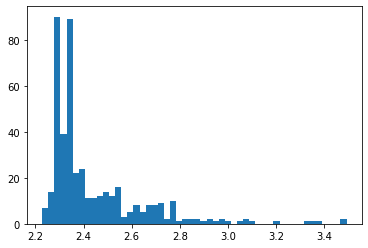

In [16]:
plt.hist(t_log, bins = 50);

MAP probability above threshold
MAP mean: 2.453     MAP var: 0.04


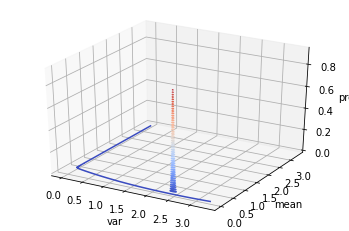

In [10]:
#n_terms = 1 if you want just the initial estimates
n_terms = len(t_log)//5     
t_obs = t_log[0:n_terms]


#set parameters
mu_0 = 1
beta = 0.1
a = 1
b = 1

#Bayesian MAP estimate of mean & variance of Gaussian distribution
mean_test, var_test, posterior, mean_map, var_map = Normal_Gamma_bayes(t_obs, mu_0, beta, a, b)
print("MAP mean:", mean_map, "    MAP var:", var_map)

#store mean_map & mean_var for comparison
mean_map_old = mean_map
var_map_old = var_map

In [12]:
#compare to MLE mean & var
mean_ml, var_ml = Gaussian_ml(t_log)
print("MLE mean:", mean_ml, "    MLE var", var_ml)

MLE mean: 2.436156981126054     MLE var 0.04064589235412177


In [13]:
#convert to lognormal parameters (not needed)
mean_lognorm = np.exp(mean_map + 0.5* var_map)
var_lognorm = np.exp(2*mean_map + var_map) *( np.exp(var_map) - 1)
print(mean_lognorm, var_lognorm)


11.857967446453067 5.738459766203501


Text(0.5, 1.0, 'WayPoint39_WayPoint46')

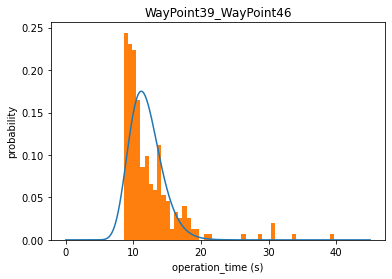

In [24]:
#Plot against actual data

t_start= 0.01
t_stop = (np.max(t_op)//5)*5 + 10    #round up to nearest 5 secs
t_step = 0.01
t_test = np.arange(t_start,t_stop,t_step)

#Duration distribution using MAP parameters from Bayesian method
#p_bayes = Gaussian(t_test,mean_map,var_map)
p_bayes2 = Lognormal(t_test,mean_map,var_map)

#plot
#plt.plot(t_test,p_bayes)
plt.plot(t_test,p_bayes2)

plt.hist(t_op, density = True, bins = 50)
#plt.legend(["Bayesian", "Actual"])
plt.xlabel("operation_time (s)")
plt.ylabel("probability")
plt.title(edge)

# 5) Manual fit

## 5a) fit lognormal

In [25]:
# OPTIONAL
#3) Select data of interest
wp1 = "WayPoint70"
wp2 = "WayPoint71"
edge = wp1 + "_" + wp2
subset = select_data_edge(df, edge)
#independent variable to plot over
t_op = subset["operation_time"]
print("done")

done


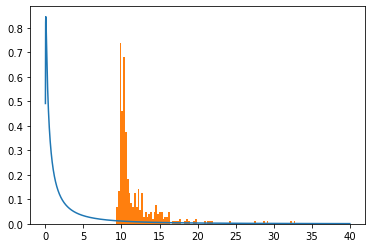

In [26]:






t_start= 0.01
t_stop = (np.max(t_op)//5)*5 + 10    #round up to nearest 5 secs
t_step = 0.01
t_test = np.arange(t_start,t_stop,t_step)
p = Lognormal(t_test, 0.2, 3)
plt.plot(t_test,p)
plt.hist(t_op, density=True,bins = 100);

In [27]:
def lognormal_widget(mean, var):
    t_start= 0.01
    t_stop = (np.max(t_op)//5)*5 + 10    #round up to nearest 5 secs
    t_step = 0.01
    t_test = np.arange(t_start,t_stop,t_step)
    p = Lognormal(t_test,mean,var)
    plt.plot(t_test,p)
    
    #t_2 = t_op - np.min(t_op)
    #plt.hist(t_2, density = True,bins = 100);   
    
   
interact(lognormal_widget, mean=(0.1,15,0.1), var = (0.1,15,0.1))

interactive(children=(FloatSlider(value=7.5, description='mean', max=15.0, min=0.1), FloatSlider(value=7.5, de…

<function __main__.lognormal_widget(mean, var)>

In [28]:
def lognormal_widget_offset(mean, var, offset):
    t_start= 0.01
    t_stop = (np.max(t_op)//5)*5 + 10    #round up to nearest 5 secs
    t_step = 0.01
    t_test = np.arange(t_start,t_stop,t_step)
    p = Lognormal(t_test,mean,var)
    plt.plot(t_test+offset,p)
    
    plt.hist(t_op, density = True,bins = 100);   
    
   
interact(lognormal_widget_offset, mean=(0.05,2,0.05), var = (0.05,2,0.05), offset = (5,15,0.1))

interactive(children=(FloatSlider(value=1.0, description='mean', max=2.0, min=0.05, step=0.05), FloatSlider(va…

<function __main__.lognormal_widget_offset(mean, var, offset)>

## 5b) Fit Invgauss

In [131]:
# OPTIONAL
#3) Select data of interest
wp1 = "WayPoint72"
wp2 = "WayPoint71"
edge = wp1 + "_" + wp2
subset = select_data_edge(df, edge)
#independent variable to plot over
t_op = subset["operation_time"]
print("done")

done


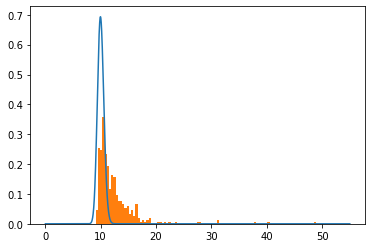

In [132]:
def Inverse_Gaussian(x, mu, L):
    norm_const = np.sqrt(L/ (2*np.pi*x**3))
    exponent = -(1 / (2* (mu**2) *x)) * L * np.square(x-mu)
    return norm_const * np.exp(exponent)

t_start= 0.01
t_stop = (np.max(t_op)//5)*5 + 10    #round up to nearest 5 secs
t_step = 0.01
t_test = np.arange(t_start,t_stop,t_step)
p = Inverse_Gaussian(t_test, 10, 3000)
plt.plot(t_test,p)
plt.hist(t_op, density=True,bins = 100);

In [133]:
def invgauss_widget(mu, L):
    t_start= 0.01
    t_stop = (np.max(t_op)//5)*5 + 10    #round up to nearest 5 secs
    t_step = 0.01
    t_test = np.arange(t_start,t_stop,t_step)
    p = Inverse_Gaussian(t_test,mu,L)
    plt.plot(t_test,p)
    
    t_2 = t_op - np.min(t_op)
    plt.hist(t_2, density = True,bins = 100);   
    
   
interact(invgauss_widget, mu=(0.1,10,0.1), L = (0.1,10,0.1))

interactive(children=(FloatSlider(value=5.0, description='mu', max=10.0, min=0.1), FloatSlider(value=5.0, desc…

<function __main__.invgauss_widget(mu, L)>

In [134]:
def invgauss_widget_offset(mu, L, offset):
    t_start= 0.01
    t_stop = (np.max(t_op)//5)*5 + 10    #round up to nearest 5 secs
    t_step = 0.01
    t_test = np.arange(t_start,t_stop,t_step)
    p = Inverse_Gaussian(t_test,mu,L)
    plt.plot(t_test+offset, p)
    
    plt.hist(t_op, density = True,bins = 100);   
    
   
interact(invgauss_widget_offset, mu=(0.1,10,0.1), L = (0.1,10,0.1), offset = (5,15,0.1))

interactive(children=(FloatSlider(value=5.0, description='mu', max=10.0, min=0.1), FloatSlider(value=5.0, desc…

<function __main__.invgauss_widget_offset(mu, L, offset)>

## 5c) Invgamma

In [18]:
# OPTIONAL
#3) Select data of interest
wp1 = "WayPoint39"
wp2 = "WayPoint46"
edge = wp1 + "_" + wp2
subset = select_data_edge(df, edge)
#independent variable to plot over
t_op = subset["operation_time"]
print("done")

done


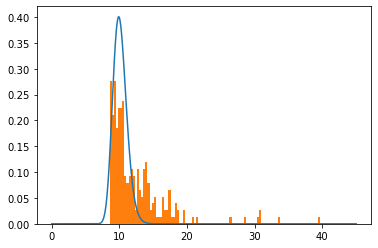

In [20]:
def Inverse_Gamma(x,a,b):
    denominator = sp.special.gamma(a)
    norm_const = (b**a) / denominator
    exponent = -b/x
    return norm_const * np.multiply(x**(-(a+1)), np.exp(exponent))

t_start= 0.01
t_stop = (np.max(t_op)//5)*5 + 10    #round up to nearest 5 secs
t_step = 0.01
t_test = np.arange(t_start,t_stop,t_step)
p = Inverse_Gamma(t_test, 100, 1000)
plt.plot(t_test,p)
plt.hist(t_op, density=True,bins = 100);

In [137]:
def invgamma_widget(a, b):
    t_start= 0.01
    t_stop = (np.max(t_op)//5)*5 + 10    #round up to nearest 5 secs
    t_step = 0.01
    t_test = np.arange(t_start,t_stop,t_step)
    p = Inverse_Gamma(t_test,a,b)
    plt.plot(t_test,p)
    
    t_2 = t_op - np.min(t_op)
    plt.hist(t_2, density = True,bins = 100);   
    
   
interact(invgamma_widget, a=(0.1,10,0.1), b = (0.1,10,0.1))

interactive(children=(FloatSlider(value=5.0, description='a', max=10.0, min=0.1), FloatSlider(value=5.0, descr…

<function __main__.invgamma_widget(a, b)>

In [21]:
def invgamma_widget_offset(a, b, offset):
    t_start= 0.01
    t_stop = (np.max(t_op)//5)*5 + 10    #round up to nearest 5 secs
    t_step = 0.01
    t_test = np.arange(t_start,t_stop,t_step)
    p = Inverse_Gamma(t_test,a,b)
    plt.plot(t_test+offset,p)
    
    plt.hist(t_op, density = True,bins = 100);   
    
   
interact(invgamma_widget_offset, a=(0.1,10,0.1), b = (0.1,15,0.1), offset = (5,15,0.1))

interactive(children=(FloatSlider(value=5.0, description='a', max=10.0, min=0.1), FloatSlider(value=7.5, descr…

<function __main__.invgamma_widget_offset(a, b, offset)>

# 6) Test for mixtures

## 6a) Gaussian mixture models

In [141]:
# OPTIONAL
#3) Select data of interest
wp1 = "WayPoint69"
wp2 = "WayPoint70"
edge = wp1 + "_" + wp2
subset = select_data_edge(df, edge)
#independent variable to plot over
t_op = subset["operation_time"]
print("done")

done


In [201]:
print( t_op[:,np.newaxis].shape )

(448, 1)


Converged  True


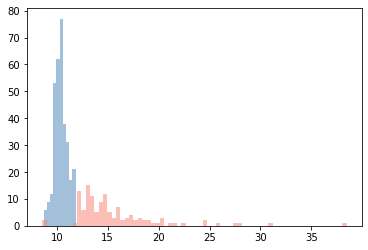

In [218]:
# Fit our 1D data using a Gaussian Mixture Model, performs soft clustering
gmm = GaussianMixture(n_components=2).fit(t_op[:,np.newaxis])
# Predict the labels
labels = gmm.predict(t_op[:,np.newaxis])
print("Converged ",gmm.converged_)

plt.hist(t_op[labels == 0], bins = 10, color='steelblue', alpha = 0.5);
plt.hist(t_op[labels == 1], bins = 70, color='salmon', alpha = 0.5);

Converged  True
324 17 107


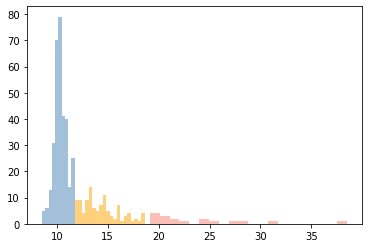

In [246]:
# Fit our 1D data using a Gaussian Mixture Model, performs soft clustering
gmm = GaussianMixture(n_components=3).fit(t_op[:,np.newaxis])
# Predict the labels
labels = gmm.predict(t_op[:,np.newaxis])
print("Converged ",gmm.converged_)

plt.hist(t_op[labels == 0], bins = 10, color='steelblue', alpha = 0.5);
plt.hist(t_op[labels == 1], bins = 20, color='salmon', alpha = 0.5);
plt.hist(t_op[labels == 2], bins = 20, color='orange', alpha = 0.5);
print( np.sum(labels == 0),np.sum(labels == 1),np.sum(labels == 2) )

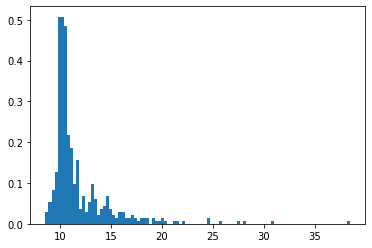

In [209]:
plt.hist(t_op, density = True, bins = 100);

Text(0, 0.5, 'Log of BIC scores')

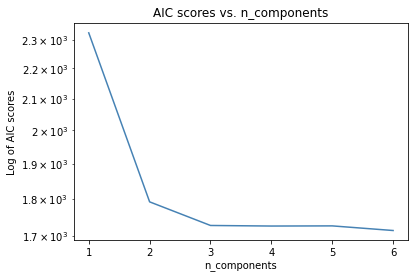

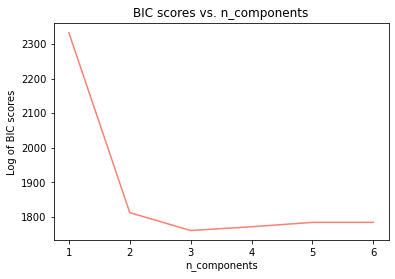

In [182]:
#try mixtures from 1 to n
n = 7
gmm_models = [GaussianMixture(n_components=i).fit(t_op[:,np.newaxis]) for i in range(1,n)]

aic_vals = [model.aic(t_op[:,np.newaxis]) for model in gmm_models]
bic_vals = [model.bic(t_op[:,np.newaxis]) for model in gmm_models]
plt.plot(range(1,n), aic_vals, color='steelblue')
plt.title('AIC scores vs. n_components')
plt.yscale('log')
plt.ylabel('Log of AIC scores')
plt.xlabel('n_components')
plt.figure()
plt.plot(range(1,n),bic_vals, color='salmon')
plt.title('BIC scores vs. n_components')
plt.xlabel('n_components')
plt.ylabel('Log of BIC scores')



# 7) Kernel Density Estimation

## 7a) Gaussian kernel
- Not really amenable to bayesian updates?
- but could be a better alternative to the histograms

In [247]:
# OPTIONAL
#3) Select data of interest
wp1 = "WayPoint69"
wp2 = "WayPoint70"
edge = wp1 + "_" + wp2
subset = select_data_edge(df, edge)
#independent variable to plot over
t_op = subset["operation_time"]
print("done")

done


Text(0.5, 1.0, 'KDE in log scale vs. x')

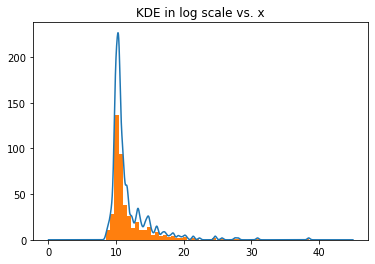

In [261]:
from scipy.stats import norm
t_start= 0.01
t_stop = (np.max(t_op)//5)*5 + 10    #round up to nearest 5 secs
t_step = 0.01
t_test = np.arange(t_start,t_stop,t_step)

density_estimate = sum(norm(elem, scale=0.2).pdf(t_test) for elem in t_op)
plt.plot(t_test, density_estimate)
plt.hist(t_op, bins = 50)
plt.yscale('linear') # try linear and log scale
plt.title('KDE in log scale vs. x')

## 7b) Using sklearn

Text(0.5, 1.0, 'Log probability of KDE vs. x')

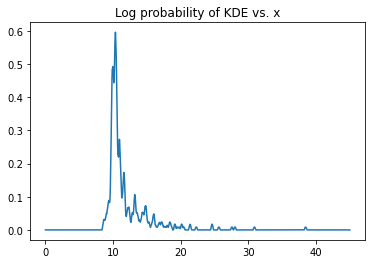

In [268]:
from sklearn.neighbors import KernelDensity
#kernel{‘gaussian’, ‘tophat’, ‘epanechnikov’, ‘exponential’, ‘linear’, ‘cosine’}, default=’gaussian’
kde = KernelDensity(bandwidth=0.2, kernel='cosine')
kde.fit(t_op[:, np.newaxis])
logprob = kde.score_samples(t_test[:,None])
plt.plot(t_test, np.exp(logprob))
plt.title('Log probability of KDE vs. x')

In [269]:
kde.get_params()

{'algorithm': 'auto',
 'atol': 0,
 'bandwidth': 0.2,
 'breadth_first': True,
 'kernel': 'cosine',
 'leaf_size': 40,
 'metric': 'euclidean',
 'metric_params': None,
 'rtol': 0}